## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
total_users = float(df.shape[0])
total_users

294478.0

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
users_converted = float(df.query('converted == 1')['user_id'].nunique())
p1 = (users_converted/total_users)
print("The proportion of users converted is {0:.2%}".format(p1))

The proportion of users converted is 11.94%


e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")')['user_id'].count()

3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().values.any()

False

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:

df2 = df.drop(df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page") or (group == "control" and landing_page != "old_page") or (group != "control" and landing_page == "old_page")').index)


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.duplicated(['user_id'], keep= False)]['user_id']



1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2 = df2.drop(df2[(df2.user_id == 773192) & (df2['timestamp'] == '2017-01-09 05:37:58.781806')].index)
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
converted_users2 = float(df2.query('converted == 1')['user_id'].nunique())
p2 = converted_users2/float(df2.shape[0])
print("The probability of an individual converting regardless of the page they receive is {0:.2%}".format(p2))

The probability of an individual converting regardless of the page they receive is 11.96%


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
converted_controlusers2 = float(df2.query('converted == 1 and group == "control"')['user_id'].nunique())
control_users2 =float(df2.query('group == "control"')['user_id'].nunique())
cp2 = converted_controlusers2 /control_users2
print(" Given that an individual was in the control group, the probability they converted is {0:.2%}".format(cp2))

 Given that an individual was in the control group, the probability they converted is 12.04%


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
converted_controlusers2 = float(df2.query('converted == 1 and group == "treatment"')['user_id'].nunique())
treat_users2 =float(df2.query('group == "treatment"')['user_id'].nunique())
tp2 = converted_controlusers2 /treat_users2
print(" Given that an individual was in the treatment group, the probability they converted is {0:.2%}".format(tp2))

 Given that an individual was in the treatment group, the probability they converted is 11.88%


d. What is the probability that an individual received the new page?

In [17]:
new_page_users2 = float(df2.query('landing_page == "new_page"')['user_id'].nunique())
Newpage_p2 = new_page_users2/float(df2.shape[0])
print("The probability that an individual received the new page is {0:.2%}".format(Newpage_p2))

The probability that an individual received the new page is 50.01%


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

There is no sufficient evidence to say that the new treatment page leads to more conversions.
Conversion rate for control group(12.04%) is higher than treatment group(11.88%).we cannot conclude which page is better at this point in analysis.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

 ![title](pic.png)

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
# Compute converted success rate, which equals to the converted success rate regardless of page
p_new = round(float(df2.query('converted == 1')['user_id'].nunique())/float(df2['user_id'].nunique()),4)

# Display converted success rate
p_new

0.1196

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
p_old = round(float(df2.query('converted == 1')['user_id'].nunique())/float(df2['user_id'].nunique()),4)
p_old

0.1196

c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
#Compute the number of unique users who has new page using df2 dataframe
N_new = df2.query('landing_page == "new_page"')['user_id'].nunique()

#display the number of unique users who has new page
N_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
#Compute the number of unique users who has old page  using df2 dataframe
N_old = df2.query('landing_page == "old_page"')['user_id'].nunique() 
#display the number of unique users who has new page
N_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
#Simulate  n_new  transactions with a convert rate of  p_new  under the null
new_page_converted = np.random.choice([0,1],N_new, p=(p_new,1-p_new))

#Display new_page_converted
new_page_converted

array([1, 1, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.choice([0,1],N_old,p=(p_old,1-p_old))
old_page_converted

array([1, 1, 1, ..., 1, 1, 0])

In [24]:
new_page_converted.mean()

0.8798706214300461

In [25]:
old_page_converted.mean()

0.8795173258807495

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
new_page_converted.mean()-old_page_converted.mean()

0.0003532955492966394

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:
p_diffs = []
size = df.shape[0]
for _ in range(10000):
    samp = df2.sample(size, replace = True)
    new_page_converted = np.random.choice([0,1],N_new, p=(p_new,1-p_new))
    old_page_converted = np.random.choice([0,1],N_old, p=(p_old,1-p_old))
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

In [28]:
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  21.,  151.,  682., 1719., 2686., 2605., 1506.,  508.,  106.,
          16.]),
 array([-4.40307489e-03, -3.50965788e-03, -2.61624086e-03, -1.72282384e-03,
        -8.29406829e-04,  6.40101869e-05,  9.57427203e-04,  1.85084422e-03,
         2.74426123e-03,  3.63767825e-03,  4.53109527e-03]),
 <a list of 10 Patch objects>)

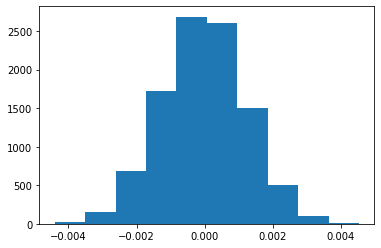

In [29]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
act_diff = df[df['group'] == 'treatment']['converted'].mean() -  df[df['group'] == 'control']['converted'].mean()
act_diff

-0.0014795997940775518

In [31]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

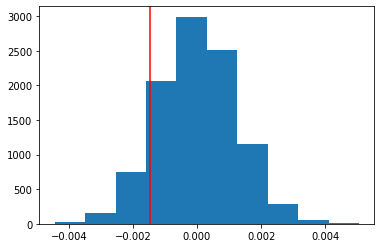

In [32]:
#Plot Null distribution
plt.hist(null_vals)
#Plot vertical line for observed statistic
plt.axvline(x= act_diff,color ='red')

In [33]:
#Compute proportion of the p_diffs are greater than the actual difference observed in ab_data.csv
(null_vals > act_diff).mean()

0.8893

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

# answer

We summary null hypothesis is true because P-value is 0.89 this value indicates, in which extend the null hypothisis can be assumed to be true.If treshhold of 5%, our p-value needs to be less than 0.05 in order to rightfully reject the null hypothisis and adapt the alternative.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
import statsmodels.api as sm

df2.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [35]:
convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [36]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [37]:
from scipy.stats import norm

print(norm.cdf(z_score)) # Tells us how significant our z-score is

# for our single-sides test, assumed at 95% confidence level, we calculate: 
print(norm.ppf(1-(0.05)))

0.9050583127590245
1.6448536269514722


# ANSWER

- The z-score indicates, how many standard deviations an element is from the mean.
- The p-score is the confidence level for our null hypothesis.
- z-score is 1.31092419842 is less than the critical value of 1.64485362695. So, we accept the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We are dealing with binary output, Logistic regression should be used.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [38]:
df['intercept']=1
df[['control', 'treatment']] = pd.get_dummies(df['group'])

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [39]:
import statsmodels.api as sm
logit = sm.Logit(df['converted'],df[['intercept','treatment']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [40]:
results = logit.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366243
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              215704.9004
Date:               2020-02-25 13:24 BIC:              215726.0864
No. Observations:   294478           Log-Likelihood:   -1.0785e+05
Df Model:           1                LL-Null:          -1.0785e+05
Df Residuals:       294476           LLR p-value:      0.21611    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9887    0.0080  -248.2967  0.0000  -2.0044  -1.9730
treatment    -0.0140    0.0114    -1.2369  0.2161  -0.0363   0.0082
==================================================================

"""

In [41]:
1/np.exp(-0.0150)

1.015113064615719

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

# answer e
The p-value associated with ab_page is 0.190 statistically unsignificant given the treshhold is set to be 5%.logistic regression suggests that users on the old page are about 1.015 more likely to convert on average than users on the new page.The difference in p-values can be inferred by the way we designed the null and alternative hypothesis in Part II, where we set p_new and p_old to the same value.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

# answer f
- Factors like device on which tests were taken or course which was looked at, prior academic background, age, might alter experience and ultimately, conversions. These are limitations which should be at least kept in mind while making the final decision.<p></p>

- Adding more variables to the regression model is very useful in many ways. On the one hand, A significant bivariate relationship might not always be significant upon observation of multiple relationships and might lead to false conclusions. Adding more values to a regression model allows us to define the relation of a response variable to an explanatory variable while holding other variables constant. <p></p>

- The disadvantage for adding additional terms into the regression model is that it will make interpret the model more complex and also if new terms are dependable variables with the existing explanatory term, we need to add a higher-order term to help predict the result better. <p></p>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [42]:
countries_df = pd.read_csv('./countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [43]:
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [44]:
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [45]:
### Create the necessary dummy variables
df_new[['CA', 'US']] = pd.get_dummies(df_new['country'])[['CA','US']]

df_new['country'].astype(str).value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [46]:
### Fit Your Linear Model And Obtain the Results
df['intercept'] = 1


log_mod = sm.Logit(df_new['converted'], df_new[['CA', 'US']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.447174
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: -0.221     
Dependent Variable: converted        AIC:              259887.4421
Date:               2020-02-25 13:24 BIC:              259908.6014
No. Observations:   290584           Log-Likelihood:   -1.2994e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      1.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
CA       -2.0375     0.0260    -78.3639   0.0000   -2.0885   -1.9866
US       -1.9967     0.0068   -292.3145   0.0000   -2.0101   -1.9833
==================================================================

"""

In [47]:
np.exp(results.params)

CA    0.130350
US    0.135779
dtype: float64

In [48]:
1/_

0.00010001000100010001

In [49]:
df.groupby('group').mean()['converted']

group
control      0.120399
treatment    0.118920
Name: converted, dtype: float64

# Conclusions

- Change methodology between part II and part III, p-value changed. But in either case, we fail to reject the null as value is still higher than alpha.</a>


- No practical significance in rolling out the new page over old page.Coversion rate oldpage is better than new one.



<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

4294967295